# MVP Análise de Dados e Boas Práticas

**Nome:** Guilherme Levcovitz de Souza

**Matrícula:** 4052025000762

**Dataset:** Adult - https://archive.ics.uci.edu/dataset/2/adult

 **------**

# Descrição do Problema

O conjunto trás dados do censo, e o objetivo é prever se um indivíduo possui renda anual superior a $50K.

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é prever a qual classe cada indivíduo pertence (renda <= $50K/ano, renda > 50K/ano)

## Seleção de Dados

O dataset Adult está disponível para importação pela biblioteca ucimlrepo.

## Atributos do Dataset

O dataset Adult contém 48842 amostras e 14 atributos:

- ***age:*** Idade do indivíduo (valor numérico).
- ***workclass:*** Tipo de emprego ou classe trabalhista (exemplo: setor privado, governo federal, autônomo, sem pagamento).
- ***fnlwgt:*** Peso final ajustado do indivíduo na pesquisa do censo (valor numérico).
- ***education:*** Nível de escolaridade (exemplo: Ensino Médio completo, Mestrado, Doutorado).
- ***education-num:*** Representação numérica do nível de escolaridade.
- ***marital-status:*** Estado civil do indivíduo (exemplo: casado, solteiro, divorciado).
- ***occupation:*** Ocupação ou profissão (exemplo: gerente executivo, serviços técnicos, vendas).
- ***relationship:*** Relação do indivíduo dentro do domicílio (exemplo: esposa, filho próprio, não faz parte da família).
- ***race:*** Grupo racial do indivíduo (exemplo: branco, asiático, afro-americano).
- ***sex:*** Gênero do indivíduo (masculino ou feminino).
- ***capital-gain:*** Ganho de capital (valor monetário obtido, como lucro em investimentos).
- ***capital-loss:*** Perda de capital (valor monetário perdido).
- ***hours-per-week:*** Número de horas trabalhadas por semana.
- ***native-country:*** País de origem do indivíduo (exemplo: Estados Unidos, México, Japão, Índia).

# Importação das Bibliotecas Necessárias e Carga de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from ucimlrepo import fetch_ucirepo  

In [2]:
# Importa o dataset 
adult = fetch_ucirepo(id=2) 
  
# Grava as features (X) e o target (Y) em dataframes
X = adult.data.features 
y = adult.data.targets 

In [3]:
# Cria um DataFrame usando as colunas disponíveis no dataset
df = pd.DataFrame(X)

# Adicionaa coluna alvo
df['annual-income'] = y

# Exibe as primeiras linhas do DataFrame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Análise de Dados

In [4]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 48842

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  annual-income   48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


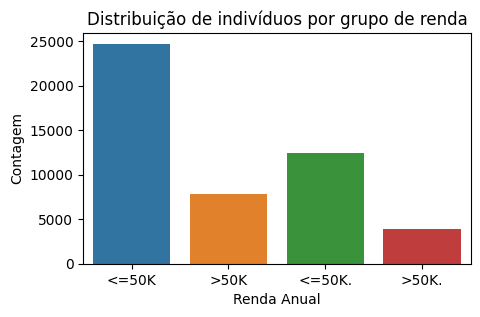

In [6]:
plt.figure(figsize=(5, 3))
# gráfico de barras simples
sns.countplot(x='annual-income', data=df)
plt.title('Distribuição de indivíduos por grupo de renda')
plt.xlabel('Renda Anual')
plt.ylabel('Contagem')
plt.show()

Nota-se uma falta de padronização no target. Para corrigir isso, basta remover a string "."

In [7]:
df['annual-income'] = df['annual-income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, regex=False)

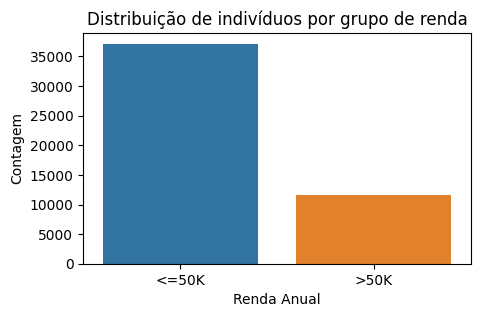

In [8]:
plt.figure(figsize=(5, 3))
# gráfico de barras simples
sns.countplot(x='annual-income', data=df)
plt.title('Distribuição de indivíduos por grupo de renda')
plt.xlabel('Renda Anual')
plt.ylabel('Contagem')
plt.show()

Com o dataset ajustado, nota-se uma proporção maior de indivíduos com renda inferior ou igual a 50K. Pode ser necessário balanceamento em etapas posteriores.

## Estatísticas Descritivas

In [9]:
# Estatísticas descritivas básicas do dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Histograma

Age (idade)

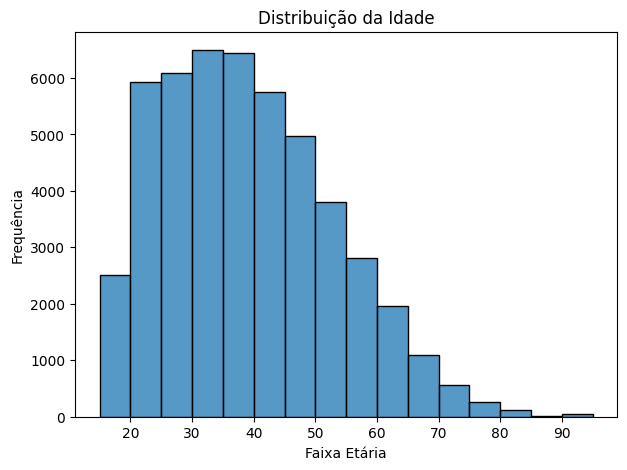

In [10]:
# Define os intervalos de idade
bins = range(15, 100, 5)  # Faixas de 5 em 5 anos, começando em 15 até 100

# Cria as categorias
df['age_group'] = pd.cut(df['age'], bins=bins, right=False)


plt.figure(figsize=(7, 5))
sns.histplot(df['age'], bins=bins)
plt.title('Distribuição da Idade')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.show()

O histograma mostra uma distribuição mais concentrada em idades menores. Nas estatísticas descritivas, vimos que a média é de 38 anos.

Education (nível de escolaridade)

In [11]:
# Cria um DataFrame com os valores únicos dessas colunas
df_combinations = df[['education', 'education-num']].drop_duplicates().sort_values(by='education-num')

print(df_combinations)

        education  education-num
224     Preschool              1
160       1st-4th              2
56        5th-6th              3
15        7th-8th              4
6             9th              5
77           10th              6
3            11th              7
415          12th              8
2         HS-grad              9
10   Some-college             10
14      Assoc-voc             11
13     Assoc-acdm             12
0       Bachelors             13
5         Masters             14
52    Prof-school             15
20      Doctorate             16


Nota-se que a escolaridade pode ser tratada como uma variável ordinal, representada pela variável education-num.

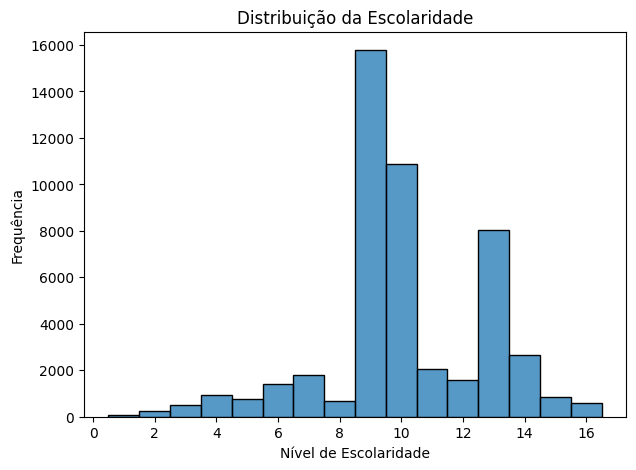

In [12]:
plt.figure(figsize=(7, 5))
sns.histplot(df['education-num'], bins=df['education-num'].nunique(), discrete=True)
plt.title('Distribuição da Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Frequência')
plt.show()

Percebe-se que a maior parte dos indivíduos se encaixa nos grupos 9 (HS-grad), 10 (Some-college) e 13 (Bachelors)

Capital gain

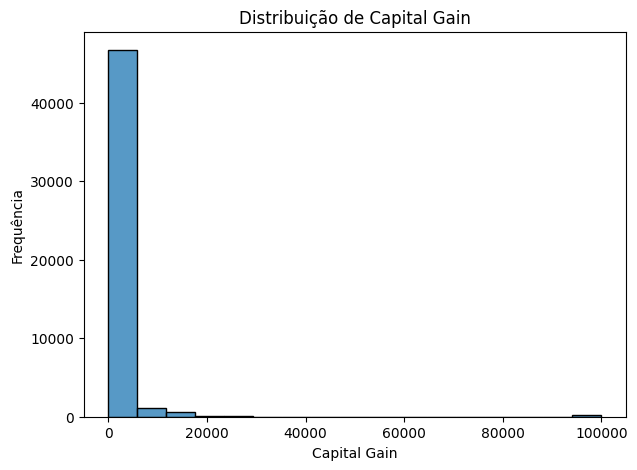

In [13]:
plt.figure(figsize=(7, 5))
sns.histplot(df['capital-gain'])
plt.title('Distribuição de Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequência')
plt.show()

Capital loss

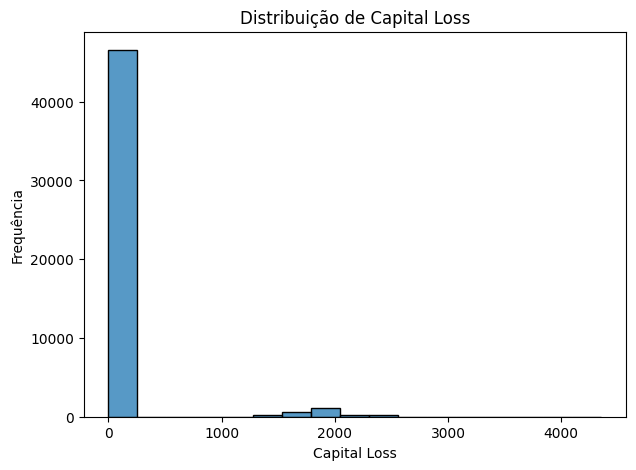

In [14]:
plt.figure(figsize=(7, 5))
sns.histplot(df['capital-loss'])
plt.title('Distribuição de Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequência')
plt.show()

Hours per week

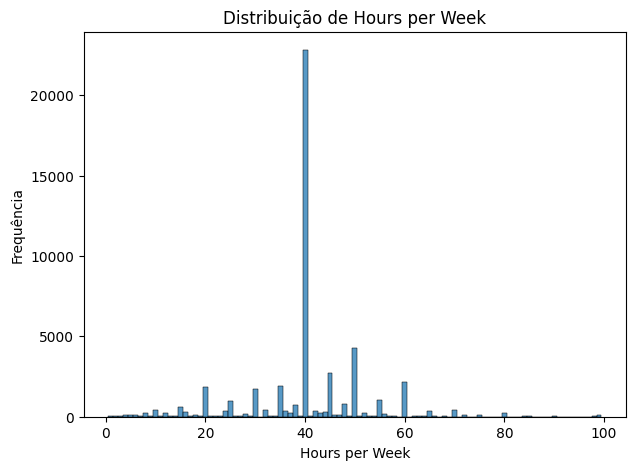

In [16]:
plt.figure(figsize=(7, 5))
sns.histplot(df['hours-per-week'], bins=df['hours-per-week'].nunique(), discrete=True)
plt.title('Distribuição de Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequência')
plt.show()

## Boxplot

In [17]:
# Estatísticas descritivas agrupadas por grupo de renda
df.groupby('annual-income').describe()

age                                                      \
                 count       mean        std   min   25%   50%   75%   max   
annual-income                                                                
<=50K          37155.0  36.872184  14.104118  17.0  25.0  34.0  46.0  90.0   
>50K           11687.0  44.275178  10.558983  19.0  36.0  43.0  51.0  90.0   

                fnlwgt                 ... capital-loss          \
                 count           mean  ...          75%     max   
annual-income                          ...                        
<=50K          37155.0  190039.565523  ...          0.0  4356.0   
>50K           11687.0  188470.574570  ...          0.0  3683.0   

              hours-per-week                                               \
                       count       mean        std  min   25%   50%   75%   
annual-income                                                               
<=50K                37155.0  38.840048  12.356849  1.0  35.0  40.0  40.0   
>50K                 11687.0  45.452896  11.091176  1.0  40.0  40.0  50.0   

                     
                max  
annual-income        
<=50K          99.0  
>50K           99.0  

[2 rows x 48 columns]

Idade por grupo de renda

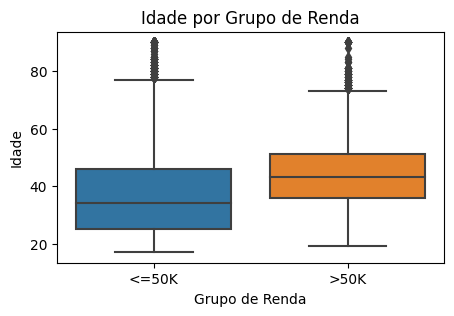

In [18]:
# Boxplot da idade por grupo de renda
plt.figure(figsize=(5, 3))
sns.boxplot(x='annual-income', y='age', data=df)
plt.title('Idade por Grupo de Renda')
plt.xlabel('Grupo de Renda')
plt.ylabel('Idade')
plt.show()

Nota-se que indivíduos que recebem mais de 50K por ano tendem a ter uma idade maior.

Escolaridade por Grupo de Renda

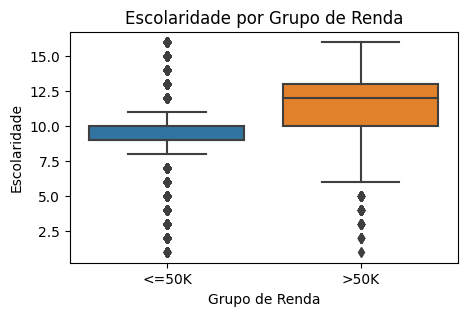

In [19]:
# Boxplot da escolaridade por grupo de renda
plt.figure(figsize=(5, 3))
sns.boxplot(x='annual-income', y='education-num', data=df)
plt.title('Escolaridade por Grupo de Renda')
plt.xlabel('Grupo de Renda')
plt.ylabel('Escolaridade')
plt.show()

Como era de se esperar, pessoas com um nível de escolaridade maior têm uma renda maior.

Hours per week por Grupo de Renda

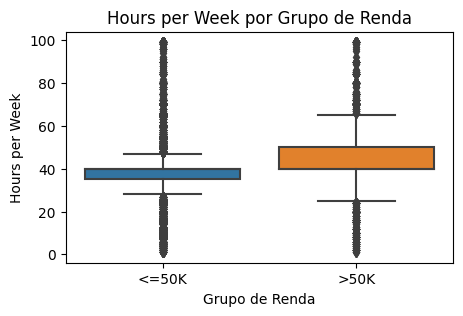

In [20]:
# Boxplot de hours per week por grupo de renda
plt.figure(figsize=(5, 3))
sns.boxplot(x='annual-income', y='hours-per-week', data=df)
plt.title('Hours per Week por Grupo de Renda')
plt.xlabel('Grupo de Renda')
plt.ylabel('Hours per Week')
plt.show()

Percebe-se que os indivíduos com renda maior tendem a trabalhar mais horas.

Capital gain por Grupo de Renda

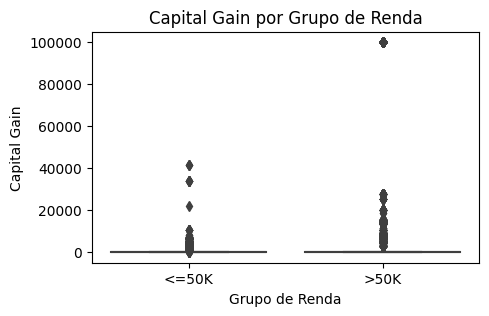

In [21]:
# Boxplot de capital gain por grupo de renda
plt.figure(figsize=(5, 3))
sns.boxplot(x='annual-income', y='capital-gain', data=df)
plt.title('Capital Gain por Grupo de Renda')
plt.xlabel('Grupo de Renda')
plt.ylabel('Capital Gain')
plt.show()

Capital loss por grupo de renda

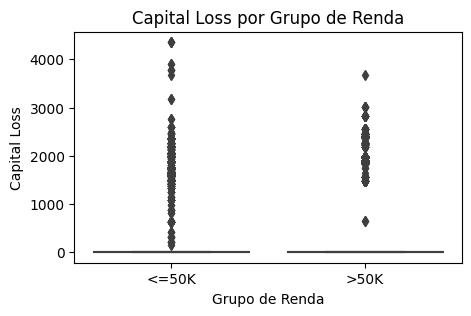

In [22]:
# Boxplot de capital loss por grupo de renda
plt.figure(figsize=(5, 3))
sns.boxplot(x='annual-income', y='capital-loss', data=df)
plt.title('Capital Loss por Grupo de Renda')
plt.xlabel('Grupo de Renda')
plt.ylabel('Capital Loss')
plt.show()

## Matriz de Correlação

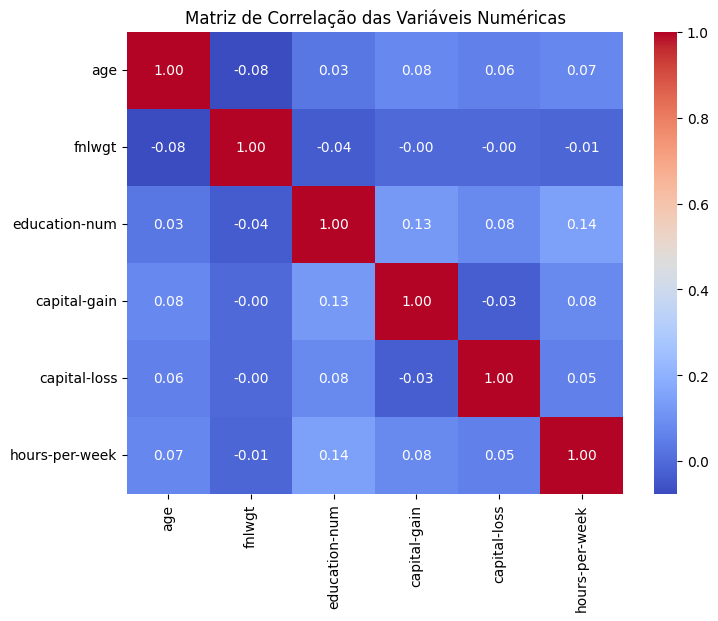

In [23]:
# Seleciona apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Cria a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

Não foi identificada nenhuma correlação significativa.

# Seleção de features

In [24]:
features_numericas = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week', ]
features_categoricas = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
target = ['annual-income']

features = features_numericas + features_categoricas + target
print(features)

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'annual-income']


A feature de nacionalidade foi excluída pois seu encoding resultaria em um número muito elevado de novas variáveis, o que pode prejudicar o modelo

# Tratamento de valores nulos

In [25]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
annual-income       0
age_group           0
dtype: int64

In [26]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [27]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Os valores nulos de occupation e workclass serão tratados como desconhecidos, como já existe no df (?).

In [28]:
df[['workclass', 'occupation']] = df[['workclass', 'occupation']].fillna('?')

In [29]:
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
annual-income       0
age_group           0
dtype: int64

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [30]:
# Seleção das features
df = df[features]
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,occupation,relationship,race,sex,annual-income
0,39,13,2174,0,40,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,13,0,0,13,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,38,9,0,0,40,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,7,0,0,40,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,13,0,0,40,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K


In [31]:
# One-hot encoding das variáveis categóricas
df_encoded = pd.get_dummies(df, columns=features_categoricas, drop_first=False)
df_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,annual-income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,<=50K,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [32]:
# Separar features (X) e target (y)
X = df_encoded.drop('annual-income', axis=1)
y = df_encoded['annual-income']

In [33]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (34189, 49)
Dimensões de X_test: (14653, 49)
Dimensões de y_train: (34189,)
Dimensões de y_test: (14653,)


## Normalização

In [35]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [36]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [37]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
df_normalized.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.328767,0.800000,0.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.191781,0.533333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.191781,0.533333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.191781,0.533333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.561644,0.533333,0.0,0.0,0.602041,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Aplicação do modelo Decision Tree

In [38]:
# Cria a instância do modelo (inclui balanceamento visto que uma das classes é mais representativa que a outra)
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [39]:
# Faz a predição
y_pred = model.predict(X_test)

In [40]:
# Calcula a acurácia do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.8194226438272026


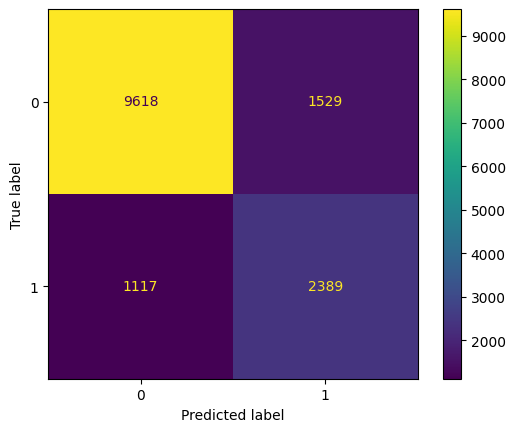

In [41]:
# Cria uma matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

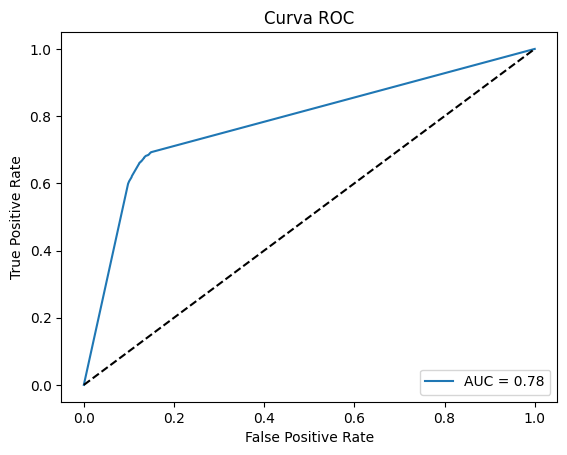

In [42]:
# Converte os rótulos para binário: '>50K' vira 1, '<=50K' vira 0
y_test_bin = (y_test == '>50K').astype(int)
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()